# Image Informatics Lab 2
## 1.1 Histograms and Histogram Processing
Tasks:
1. Plot the histograms of each of the R, G and B colour channels from an image. Plot each in
it corresponding colour and overlay them as a single image
2. Perform histogram equalization on each of the R, G and B colour channels from an image.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, img_as_ubyte
import cv2
from skimage.exposure import equalize_hist


In [26]:
def rgb_isolate_channel(im, channel):
    """ 
    Isolate a single color channel in an RGB image.
    
    Parameters:
        im (ndarray): Input RGB image.
        channel (str): Color channel to isolate ('R', 'G', or 'B').
    Returns:
        ndarray: Image with only the specified channel.
    """
    imc = im.copy()
    for c in range(im.shape[2]):
        if c != channel:
            imc[:, :, c] = np.zeros_like(im[:, :, c])
    return imc

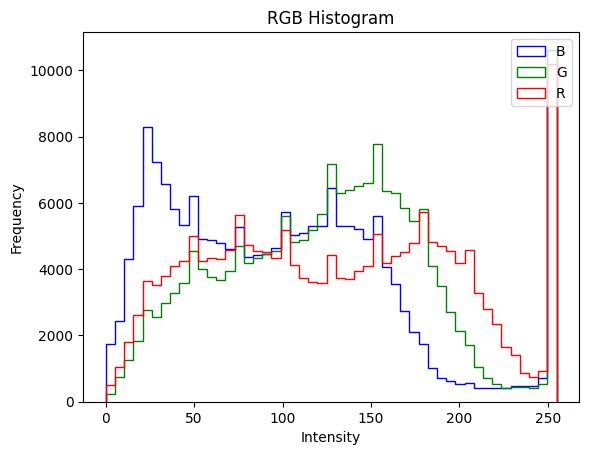

In [49]:
img = cv2.imread("p1-images/horse.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r = np.concatenate(img[:,:,0])
g = np.concatenate(img[:,:,1])
b = np.concatenate(img[:,:,2])
bins = np.linspace(0, 255, 50)
plt.hist([r, g, b], bins, label=['R', 'G', 'B'], color=['r', 'g', 'b'], histtype='step')
plt.legend(loc='upper right')
plt.title("RGB Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

d:\Python\Python313\Lib\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


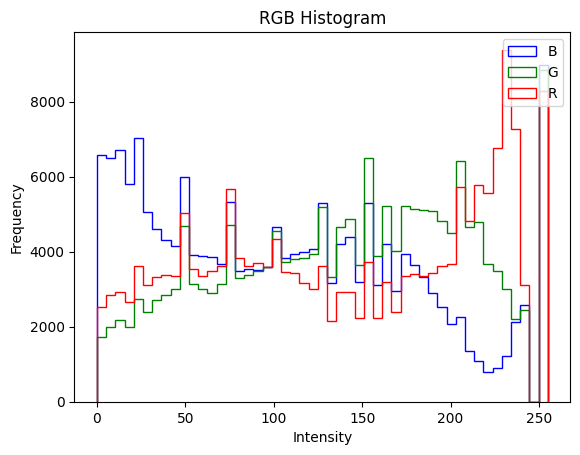

In [61]:
img = cv2.imread("p1-images/horse.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imeq = equalize_hist(img)
imeq = img_as_ubyte(imeq)
r = np.concatenate(imeq[:,:,0])
g = np.concatenate(imeq[:,:,1])
b = np.concatenate(imeq[:,:,2])
bins = np.linspace(0, 255, 50)
plt.hist([r, g, b], bins, label=['R', 'G', 'B'], color=['r', 'g', 'b'], histtype='step')
plt.legend(loc='upper right')
plt.title("RGB Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

## 1.2 Colour Image Processing

Tasks:
1. Separate out objects in the scene of a particular Hue value. Add these back as a colour overlay
onto the original image in grayscale as per the example of the rose (Hue = Red).
2. Perform Histogram Equalization on the V channel of an HSV version of a RGB colour image
before converting back to RGB for display. Compare this to just performing Histogram
Equalization on each channel of the RGB version of he image. Display both version in
different windows. The difference in result is also apparent for all contrast enhancement and
manipulation approaches.

In [55]:
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

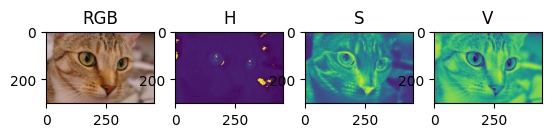

In [57]:
im = data.chelsea()
im_hsv = rgb2hsv(im)
im_hsv_h = im_hsv[:,:,0]
im_hsv_s = im_hsv[:,:,1]
im_hsv_v = im_hsv[:,:,2]
fig = plt.figure()
ax = fig.add_subplot(1, 4, 1)

p = plt.imshow(im)
t = ax.set_title('RGB')
ax = fig.add_subplot(1, 4, 2)
p = plt.imshow(im_hsv_h)
t = ax.set_title('H')
ax = fig.add_subplot(1, 4, 3)
p = plt.imshow(im_hsv_s)
t = ax.set_title('S')
ax = fig.add_subplot(1, 4, 4)
p = plt.imshow(im_hsv_v)
t = ax.set_title('V')
